In [156]:
import matplotlib.pyplot as plt

In [157]:
import cv2

In [158]:
%matplotlib inline

In [159]:
Accident_img=cv2.imread('Train/Accident/1.crash_crop_Steve_Sommerville___Super_Portrait.jpg')

In [160]:
Accident_img=cv2.cvtColor(Accident_img,cv2.COLOR_BGR2RGB)

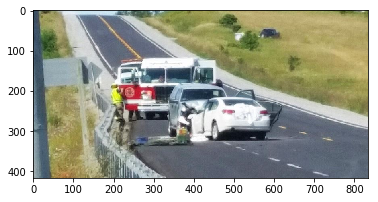

In [161]:
plt.imshow(Accident_img)

In [162]:
Accident_img.shape

(417, 834, 3)

In [163]:
Accident_img.max()

255

In [164]:
from keras.preprocessing.image import ImageDataGenerator

In [165]:
image_gen=ImageDataGenerator(rotation_range=30,width_shift_range=0.1,height_shift_range=0.1,rescale=1/255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,fill_mode='nearest')

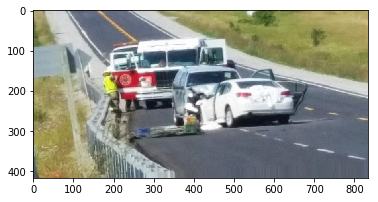

In [166]:
plt.imshow(image_gen.random_transform(Accident_img))

In [167]:
image_gen.flow_from_directory('Train')

Found 252 images belonging to 2 classes.


In [168]:
input_shape=(150,150,3)

In [169]:
from keras.models import Sequential

In [170]:
from keras.layers import Activation,Dropout,Flatten,Conv2D,MaxPooling2D,Dense

In [171]:
model=Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))



model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))



model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))




model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))



model.add(Dense(1))
model.add(Activation('sigmoid'))



model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])








In [172]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 15, 15, 64)        36928     
__________

In [173]:
batch_size=16


training_image_gen=image_gen.flow_from_directory('Train',
                                                target_size=input_shape[:2],
                                                batch_size=batch_size,
                                                class_mode='binary')

Found 252 images belonging to 2 classes.


In [174]:
test_image_gen=image_gen.flow_from_directory('Test',
                                                target_size=input_shape[:2],
                                                batch_size=batch_size,
                                                class_mode='binary')

Found 101 images belonging to 2 classes.


In [175]:
training_image_gen.class_indices

{'Accident': 0, 'Non Accident': 1}

In [176]:
results=model.fit_generator(training_image_gen,epochs=50,steps_per_epoch=64,validation_data=test_image_gen,validation_steps=24)

Epoch 1/50
64/64 [==============================] - 31s 491ms/step - loss: 0.6930 - acc: 0.5231 - val_loss: 0.6938 - val_acc: 0.4900
Epoch 2/50
64/64 [==============================] - 29s 457ms/step - loss: 0.6832 - acc: 0.5693 - val_loss: 0.6761 - val_acc: 0.5755
Epoch 3/50
64/64 [==============================] - 27s 425ms/step - loss: 0.6794 - acc: 0.5905 - val_loss: 0.6626 - val_acc: 0.6206
Epoch 4/50
64/64 [==============================] - 27s 420ms/step - loss: 0.6402 - acc: 0.6335 - val_loss: 0.6326 - val_acc: 0.6524
Epoch 5/50
64/64 [==============================] - 29s 448ms/step - loss: 0.6043 - acc: 0.6790 - val_loss: 0.6018 - val_acc: 0.6824
Epoch 6/50
64/64 [==============================] - 28s 433ms/step - loss: 0.5962 - acc: 0.6793 - val_loss: 0.6164 - val_acc: 0.6524
Epoch 7/50
64/64 [==============================] - 27s 425ms/step - loss: 0.5627 - acc: 0.7106 - val_loss: 0.5568 - val_acc: 0.7265
Epoch 8/50
64/64 [==============================] - 28s 431ms/step - 

In [177]:
results.history['acc']

[0.5238095236912607,
 0.5694444444444444,
 0.5912698407967886,
 0.6339285720198874,
 0.6795634918269657,
 0.678571428807955,
 0.7113095240460502,
 0.7599206342110558,
 0.7738095238095238,
 0.7886904759539498,
 0.7996031746031746,
 0.8184523811889073,
 0.8204365079365079,
 0.8065476188110927,
 0.8214285714285714,
 0.866071428807955,
 0.8541666664301403,
 0.8611111115841639,
 0.8769841272206533,
 0.8640873013507753,
 0.8769841274571797,
 0.8928571426206164,
 0.8898809528540051,
 0.8740079360348838,
 0.9007936510301772,
 0.8968253972984496,
 0.9166666673762458,
 0.9196428573793836,
 0.9295634918269657,
 0.9454365084095607,
 0.9464285721381506,
 0.9236111113476375,
 0.9424603179333702,
 0.9325396823031562,
 0.9494047623778147,
 0.9513888891254153,
 0.9533730158730159,
 0.9652777784873569,
 0.9692460319825581,
 0.9503968258698782,
 0.9563492058761536,
 0.9662698412698413,
 0.9751984126984127,
 0.9623015875381137,
 0.9593253972984496,
 0.9543650788920266,
 0.9652777780143041,
 0.937500000236

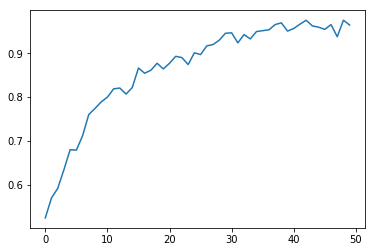

In [178]:
plt.plot(results.history['acc'])

In [179]:
model.save('model_accident_detection.h5')

In [190]:
car_crash='Test/Accident/test.jpg'

In [191]:
from keras.preprocessing import image

In [192]:
car_img=image.load_img(car_crash,target_size=(150,150))

In [193]:
car_img=image.img_to_array(car_img)

In [194]:
car_img.shape

(150, 150, 3)

In [195]:
import numpy as np


car_img=np.expand_dims(car_img,axis=0)

In [196]:
car_img.shape

(1, 150, 150, 3)

In [197]:
car_img=car_img/255

In [198]:
model.predict_classes(car_img)

array([[1]])

In [199]:
model.predict(car_img)

array([[0.97910196]], dtype=float32)